In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier, plot_importance, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize, StandardScaler

In [2]:
X = pd.read_csv('X_train_processed.csv')
y = pd.read_csv('y_train.csv')

In [3]:
X

,id,HRV_AI,HRV_ApEn,HRV_C1a,HRV_C1d,HRV_C2a,HRV_C2d,HRV_CD,HRV_CMSE,HRV_CSI,...,mean_QRS_complexes,mean_RR_intervals,median_QRS_complexes,median_RR_intervals,min_QRS_complexes,min_RR_intervals,range_QRS_complexes,range_RR_intervals,std_QRS_complexes,std_RR_intervals
0,0,71.591574,0.514348,0.012600,0.987400,0.157796,0.842204,0.398465,NaN,1.175331,...,58.317460,244.753846,52.0,249.0,22.0,97.0,101.0,159.0,24.276728,19.614775
1,1,51.908134,0.234634,0.494226,0.505774,0.445936,0.554064,1.167187,NaN,3.167106,...,49.257143,236.714286,51.0,239.0,30.0,209.0,38.0,50.0,9.589705,13.183478
2,2,43.603251,0.415806,0.540023,0.459977,0.689101,0.310899,1.135533,NaN,2.459928,...,54.428571,270.206897,54.0,272.0,52.0,252.0,6.0,46.0,1.178030,10.587499
3,3,50.086974,0.772437,0.527063,0.472937,0.404942,0.595058,1.060521,NaN,1.117686,...,51.333333,121.984615,56.0,115.0,42.0,101.0,14.0,102.0,6.599663,21.018301
4,4,51.046612,0.291269,0.332617,0.667383,0.633494,0.366506,0.624109,NaN,1.342409,...,45.023256,183.727273,50.0,180.0,29.0,153.0,35.0,132.0,10.601642,20.749988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,5112,49.761499,0.216127,0.546794,0.453206,0.522641,0.477359,0.456537,NaN,1.113472,...,42.100000,226.200000,40.0,250.5,27.0,102.0,39.0,441.0,11.449454,92.743517
5113,5113,60.198313,0.099877,0.271777,0.728223,0.621754,0.378246,1.140816,NaN,2.386181,...,52.166667,259.375000,50.5,259.0,35.0,252.0,44.0,22.0,11.328676,4.158951
5114,5114,59.244736,0.231503,0.287689,0.712311,0.619150,0.380850,0.879756,NaN,5.830953,...,49.000000,237.181818,54.0,237.0,29.0,200.0,32.0,99.0,10.201010,28.721710
5115,5115,48.609313,0.101368,0.726560,0.273440,0.167732,0.832268,1.117129,NaN,1.219894,...,44.968750,254.500000,48.0,254.0,29.0,237.0,26.0,33.0,7.650508,8.403868


In [4]:
y

,id,y
0,0,0
1,1,0
2,2,0
3,3,1
4,4,2
...,...,...
5112,5112,3
5113,5113,0
5114,5114,0
5115,5115,0


In [5]:
drop_columns = [
    'HRV_MeanNN',
    'HRV_MedianNN',
    'HRV_LF',
    'HRV_LFHF',
    'HRV_LFn',
    'HRV_SDANN1',
    'HRV_SDANN2',
    'HRV_SDANN5',
    'HRV_SDNNI1',
    'HRV_SDNNI2',
    'HRV_SDNNI5',
    'HRV_ULF',
    'HRV_VLF',   
]

In [6]:
X = X.drop(columns=drop_columns)

In [7]:
X = X.set_index('id')
y = y.set_index('id')

In [15]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X

,HRV_AI,HRV_ApEn,HRV_C1a,HRV_C1d,HRV_C2a,HRV_C2d,HRV_CD,HRV_CMSE,HRV_CSI,HRV_CSI_Modified,...,mean_QRS_complexes,mean_RR_intervals,median_QRS_complexes,median_RR_intervals,min_QRS_complexes,min_RR_intervals,range_QRS_complexes,range_RR_intervals,std_QRS_complexes,std_RR_intervals
id,,,,,,,,,,,,,,,,,,,,,
0,71.591574,0.514348,0.012600,0.987400,0.157796,0.842204,0.398465,NaN,1.175331,250.838291,...,58.317460,244.753846,52.0,249.0,22.0,97.0,101.0,159.0,24.276728,19.614775
1,51.908134,0.234634,0.494226,0.505774,0.445936,0.554064,1.167187,NaN,3.167106,765.564511,...,49.257143,236.714286,51.0,239.0,30.0,209.0,38.0,50.0,9.589705,13.183478
2,43.603251,0.415806,0.540023,0.459977,0.689101,0.310899,1.135533,NaN,2.459928,459.759533,...,54.428571,270.206897,54.0,272.0,52.0,252.0,6.0,46.0,1.178030,10.587499
3,50.086974,0.772437,0.527063,0.472937,0.404942,0.595058,1.060521,NaN,1.117686,333.430410,...,51.333333,121.984615,56.0,115.0,42.0,101.0,14.0,102.0,6.599663,21.018301
4,51.046612,0.291269,0.332617,0.667383,0.633494,0.366506,0.624109,NaN,1.342409,430.781261,...,45.023256,183.727273,50.0,180.0,29.0,153.0,35.0,132.0,10.601642,20.749988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,49.761499,0.216127,0.546794,0.453206,0.522641,0.477359,0.456537,NaN,1.113472,1524.352058,...,42.100000,226.200000,40.0,250.5,27.0,102.0,39.0,441.0,11.449454,92.743517
5113,60.198313,0.099877,0.271777,0.728223,0.621754,0.378246,1.140816,NaN,2.386181,164.454715,...,52.166667,259.375000,50.5,259.0,35.0,252.0,44.0,22.0,11.328676,4.158951
5114,59.244736,0.231503,0.287689,0.712311,0.619150,0.380850,0.879756,NaN,5.830953,3178.406084,...,49.000000,237.181818,54.0,237.0,29.0,200.0,32.0,99.0,10.201010,28.721710


In [16]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [17]:
clf = XGBClassifier(n_estimators=100)

In [18]:
clf.fit(X_train, y_train)

/home/tvinh/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/tvinh/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[19:38:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [19]:
y_val_pred = clf.predict(X_val)
y_val_pred

array([0, 0, 0, ..., 0, 0, 2])

In [20]:
# view accuracy
from sklearn.metrics import f1_score
accuracy = f1_score(y_val_pred, y_val, average='micro')
print('XGBoost Model accuracy score: {0:0.4f}'.format(accuracy))

XGBoost Model accuracy score: 0.8001


In [21]:
clf.feature_importances_

array([0.00356613, 0.0036956 , 0.00580442, 0.        , 0.00845732,
       0.        , 0.03047834, 0.        , 0.01716451, 0.01463547,
       0.00955818, 0.00359952, 0.        , 0.0097854 , 0.00516325,
       0.00389499, 0.00388873, 0.00623337, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00809284, 0.00274777,
       0.0049582 , 0.00472871, 0.01942283, 0.00620436, 0.        ,
       0.00481388, 0.00469137, 0.00286493, 0.00526795, 0.        ,
       0.        , 0.00827994, 0.        , 0.00652205, 0.00807223,
       0.00615716, 0.00680691, 0.0109642 , 0.00306986, 0.00228411,
       0.00562272, 0.00711944, 0.00523932, 0.00325326, 0.0058228 ,
       0.00932755, 0.00999265, 0.00687571, 0.00763309, 0.00574519,
       0.01104619, 0.01257777, 0.00314074, 0.00658539, 0.00532186,
       0.00254654, 0.00770673, 0.00522546, 0.00716089, 0.00696324,
       0.0019808 , 0.00436133, 0.00573852, 0.00495911, 0.0045782 ,
       0.00952512, 0.00408465, 0.00631069, 0.0048694 , 0.00509

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

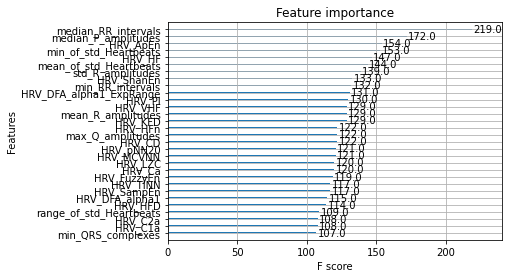

In [22]:
plot_importance(clf, max_num_features=30)

<AxesSubplot:>

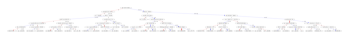

In [23]:
plot_tree(clf)

In [24]:
cm_df = confusion_matrix(y_val, y_val_pred)
cm_df = normalize(cm_df, norm='l1')

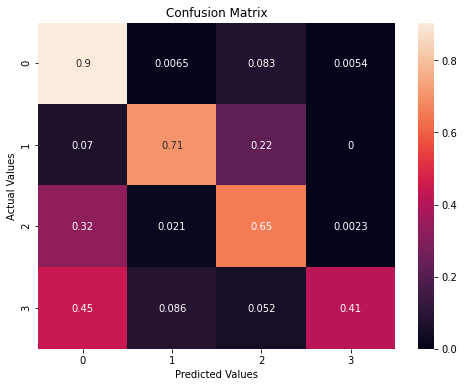

In [25]:
#Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Output

In [26]:
X_test = pd.read_csv('X_test_processed.csv')
X_test = X_test.set_index('id')
X_test = X_test.drop(columns=drop_columns)

In [27]:
X_test

,HRV_AI,HRV_ApEn,HRV_C1a,HRV_C1d,HRV_C2a,HRV_C2d,HRV_CD,HRV_CMSE,HRV_CSI,HRV_CSI_Modified,...,mean_QRS_complexes,mean_RR_intervals,median_QRS_complexes,median_RR_intervals,min_QRS_complexes,min_RR_intervals,range_QRS_complexes,range_RR_intervals,std_QRS_complexes,std_RR_intervals
id,,,,,,,,,,,,,,,,,,,,,
0,41.050276,0.436130,0.706169,0.293831,0.517418,0.482582,0.969898,NaN,4.354750,1418.528570,...,65.296296,257.258065,64.0,252.0,34.0,237.0,88.0,55.0,21.183178,17.439236
1,50.371122,0.331311,0.462957,0.537043,0.567535,0.432465,0.740712,NaN,1.163351,367.130962,...,103.750000,322.058824,85.5,322.0,70.0,258.0,93.0,113.0,34.493659,20.746284
2,51.369009,0.139583,0.515833,0.484167,0.427153,0.572847,0.754727,NaN,0.799545,808.105413,...,45.758621,281.142857,39.0,293.5,25.0,120.0,74.0,393.0,19.404328,84.549949
3,51.208644,0.330394,0.495818,0.504182,0.472865,0.527135,0.995753,NaN,1.638217,143.534395,...,72.307692,289.500000,67.0,290.0,33.0,278.0,90.0,21.0,21.808201,5.267827
4,49.087654,0.322666,0.375753,0.624247,0.838816,0.161184,0.920702,NaN,1.536799,997.007655,...,58.214286,286.035714,51.5,299.0,39.0,147.0,74.0,172.0,18.750918,39.600218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406,53.412226,0.289623,0.365092,0.634908,0.790939,0.209061,0.502607,NaN,0.768455,347.231683,...,39.804878,206.400000,38.0,212.5,25.0,99.0,41.0,216.0,10.196172,39.713222
3407,54.809639,0.602064,0.533117,0.466883,0.271503,0.728497,0.857222,NaN,1.431904,1556.803351,...,43.133333,262.774194,42.0,294.0,26.0,93.0,65.0,239.0,10.088718,70.104397
3408,51.583326,0.442048,0.460215,0.539785,0.524823,0.475177,1.447147,NaN,2.097266,620.160851,...,45.714286,227.840580,47.0,228.0,33.0,187.0,27.0,76.0,7.174533,17.218648


In [28]:
y_test = clf.predict(X_test)

In [29]:
data_y_test = {
    'id': [i for i in range(len(y_test))],
    'y': y_test
}
df_y_test = pd.DataFrame(data_y_test)
df_y_test.to_csv('y_test.csv', index=False)

In [30]:
df_y_test

,id,y
0,0,0
1,1,2
2,2,3
3,3,0
4,4,2
...,...,...
3406,3406,0
3407,3407,0
3408,3408,0
3409,3409,0


# Save model

In [31]:
import pickle

# save
pickle.dump(clf, open("xgboost.pkl", "wb"))